# Monte Carlo Methods



In [7]:
import numpy as np
from math import pi,isclose

def mc_pi( n ):
    atol = 10 ** -n

    # Initialize values
    pi_guess = 0
    n_circle = 0
    n_total  = 0

    # Loop until desired number of significant figures after the
    # decimal place have been calculated.
    while not isclose( pi_guess,pi,abs_tol=atol ):
        x,y = np.random.uniform( size=(2,) ) * 2 - 1
        if ( x**2 + y**2 ) ** 0.5 < 1.0:
            n_circle += 1
        n_total += 1
        pi_guess = n_circle / n_total * 4.0
    return pi_guess


In [8]:
def r_pi(n):
    atol = 10 ** -n
    pi_guess = 0
    while not isclose(pi_guess,pi,abs_tol = atol):
        pi_guess = np.random.uniform() * 6
    return pi_guess

## Finding the area under the curve without integration!

In [15]:
r_pi(6)

3.141593565028728

      fun: 1.3344880755994382e-13
 hess_inv: array([[0.9995569]])
      jac: array([5.06639481e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([5.16549721e-07])


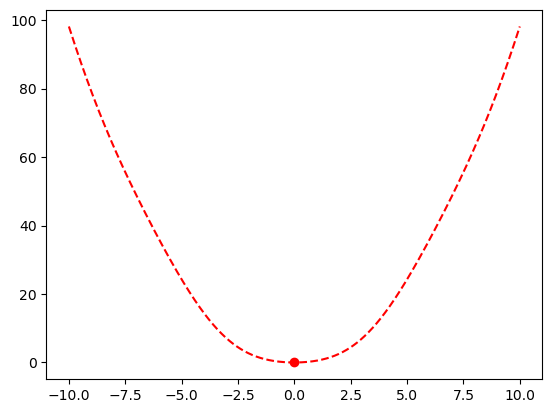

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def f( x ):
    return x**2 + np.cos(x) - 1

x = np.linspace( -10,10,1000 )
xstar = scipy.optimize.minimize( f,x0=3 )
print(xstar)
plt.plot( x,f( x ),'r--', xstar[ 'x' ],f( xstar[ 'x' ] ),'ro' )
plt.show()

In [13]:
def dfdx( f,x,h=1e-3 ):
    return ( f( x+h ) - f( x ) ) / h

def newton( f,x0,tol=1e-3 ):
    d = abs( 0 - f( x0 ) )
    while d > tol:
        x0 = x0 - f( x0 ) / dfdx( f,x0 )
        d = abs( 0 - f( x0 ) )
    return ( x0,f( x0 ) )


## Fun fact!

$e^{i \pi} + 1 = 0$ because $e^{x \pi} = cos(x) + i sin(x)$

In [21]:
import numpy
3+2j

(3+2j)

In [25]:
numpy.e ** (numpy.pi * 1j) + 1

1.2246467991473532e-16j